## Άσκηση 57 ~ Γραφική αναπαράσταση των πιθανοτήτων νίκης ενος tennis game

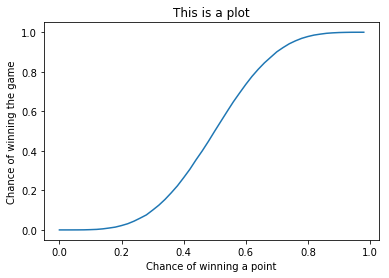

In [38]:
import random
random.seed(2016)  # for reproducibility
import statistics as stat
from simple_markov_chain_lib import markov_chain
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def f(p):

    name1 = "0-0"
    name2 = "15-0"
    name3 = "0-15"
    name4 = "30-0"
    name5 = "15-15"
    name6 = "0-30"
    name7 = "40-0"
    name8 = "30-15"
    name9 = "15-30"
    name10 = "0-40"
    name11 = "GameA"
    name12 = "40-15"
    name13 = "30-30"
    name14 = "15-40"
    name15 = "GameB"
    name16 = "40-30"
    name17 = "30-40"
    name18 = "Deuce"
    name19 = "advA"
    name20 = "advB"



    # A dictionary for the transition probability  matrix. 
    # Every state-key corresponds to a list with tuples of (Next_State,Probability) 
    markov_table = {
        name1: {name2: p, name3: 1-p},
        name2: {name4: p, name5: 1-p},
        name3: {name5: p, name6: 1-p},
        name4: {name7: p, name8: 1-p},
        name5: {name8: p, name9: 1-p},
        name6: {name9: p, name10: 1-p},
        name7: {name11: p, name12: 1-p},
        name8: {name12: p, name13: 1-p},
        name9: {name13: p, name14: 1-p},
        name10: {name14: p, name15: 1-p},
        name11: {name11: 1},
        name12: {name11: p, name16: 1-p},
        name13: {name16: p, name17: 1-p},
        name14: {name17: p, name15:1-p},
        name15: {name15: 1},
        name16: {name11: p, name18: 1-p},
        name17: {name18: p, name15: 1-p},
        name18: {name19: p, name20:1-p},
        name19: {name11: p, name18:1-p},
        name20: {name18: p, name15:1-p}
    }

    # A dictionary for the initial distribution. 
    # We prescribe the initial distribution
    init_probs = {name1: 1.0} 


    # Ok... we are ready now
    # Let's construct a Markov Chain. So let's call the constructor
    mc = markov_chain(markov_table, init_probs)
    ## Experiment parameters
    N = 100000  # number of samples
    counter = 0  # to count the number of times the event occurs

    ## Simulation
    for i in range(N):
        mc.start()  # new experiment
        while (mc.running_state != name11 and mc.running_state != name15):  mc.move()  
        if mc.running_state == name11:  counter += 1

    return counter / N

start, end, step = 0.00, 1.00, 0.02
p = np.arange(start, end, step)
i = 0
Prob = []
Prob.append(f(p[0]))
while (p[i]!= 0.98):
    i = i + 1
    Prob.append(f(p[i]))
    

plt.figure()
plt.plot(np.array(p), np.array(Prob))
plt.xlabel('Chance of winning a point')
plt.ylabel('Chance of winning the game')
plt.title('This is a plot')

Η πιθανότητα να κερδίσει το game ο παίκτης που έχει πιθανότητα νίκης πόντου p, έστω Α, δίνεται απ' τον εξής συλλογισμό: 
- Ο παίκτης Α μπορεί να κερδίσει μέσω 4 συνεχόμενων πόντων, το οποίο έχει πιθανότητα πραγματοποιήσης $p^4$.
- Ο παίκτης Α μπορεί να κερδίσει, αν κερδίσει 4 συνολικά πόντους και ανάμεσα στους πρώτους 3 να υπάρξει μια νίκη του παίκτη Β, το οποίο μπορεί να γίνει με ${4 \choose 1} = 4$ τρόπους και έχει επομένως πιθανότητα πραγματοποιήσης $4p^4q$.
- Ο παίκτης Α μπορεί να κερδίσει, αν ανάμεσα στους 4 νικηφόρους πόντους που θα πάρει, υπάρξουν 2 νίκες του Β. Αυτό μπορεί να γίνει με ${5 \choose 2} = 10$ τρόπους και έχει πιθανότητα πραγματοποιήσης $10p^4q^2$.
- Τέλος, ο παίκτης Α μπορεί να κερδίσει μετά από deuce. Το παιχνίδι μπορεί να οδηγηθεί στην κατάσταση Deuce με ${6 \choose 3} = 20$ τρόπους, ενώ στο μάθημα, μέσω της επίλυσης του αντίστοιχου Προβλήματος Συνοριακών Τιμών για την Συνάρτηση Δυναμικού $Φ$, είδαμε ότι η πιθανότητα να κερδίσει ο Α μετά από την κατάσταση Deuce είναι $\frac {p^2}{1-2pq}$. Επομένως, η πιθανότητα να κερδίσει ο Α μέσω αυτού του σεναρίου είναι $20p^3q^3 \frac {p^2}{1-2pq}$.

Συνολικά, η πιθανότητα νίκης του game από τον A δίνεται απ' την σχέση: $P = p^4 + 4p^4q + 10p^4q^2 + 20p^3q^3 \frac {p^2}{1-2pq}$. Το πολυώνυμο αυτό συμπεριφέρεται σαν την $tan(ah)$, όπου $|a|<1$. Παρατηρούμε, μεταξύ άλλων ότι για $p > 0.5$ ισχύει $P(p) > p$ και πως για πολύ μικρές και αντίστοιχα πολύ μεγάλες τιμές του $p,$ η συνάρτηση σταθεροποιείται. Τέλος, σημείο καμπής της συνάρτησης (και σταθερό της σημείο) είναι το $p = 0.5$, όπου η πιθανότητα νίκης του game είναι και αυτή $0.5$.

# Άσκηση 87

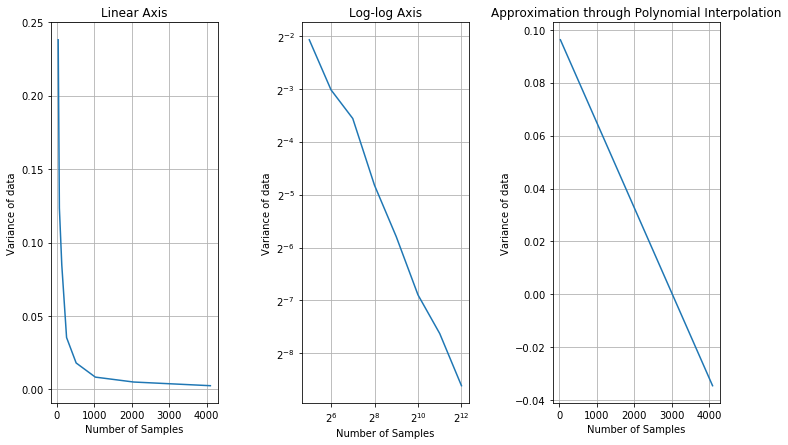

In [50]:
import random
random.seed(2016)  # for reproducibility
import statistics as stat
from simple_markov_chain_lib import markov_chain  # import markov chain simulator

def fun(N):
    # Transition Table
    markov_table = {
        0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
        1: {0: 1/3, 3: 2/3},
        2: {2: 1.},
        3: {0: .5, 3: .25, 4: .25},
        4: {4: 1.}
    }

    # Initial Distribution
    init_dist = {0: 1.}  # we start from state 0 with probability 1

    mc = markov_chain(markov_table, init_dist)
    mc_estimate = []
    M = 30

    for j in range(M):
        sample_size = N 
        running_total = 0

        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  # steps it took to be absorbed


        mc_estimate.append(running_total / sample_size)
    return stat.variance(mc_estimate)
        

N = [2 ** 5, 2 ** 6, 2 ** 7, 2 ** 8, 2 ** 9, 2 ** 10, 2 ** 11, 2 ** 12]
i = 0
Var = []
Var.append(fun(N[0]))
while (N[i]!= 2 ** 12):
    i = i + 1
    Var.append(fun(N[i]))


x = np.array(N)
y = np.array(Var)

z = np.polyfit(x, y, 1) # approximation through polynomials with degree equal to 1
p = np.poly1d(z)

plt.figure(figsize=(12, 7))  # define figure size

# Right Axes
plt.subplot(1, 3, 1)  # setup subplots 1-row, 3-cols, select the 1st
plt.plot(x, y)
plt.xlabel('Number of Samples')
plt.ylabel('Variance of data')
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 3, 2) # select the 2nd subplot
plt.loglog(x, y, basex=2, basey=2)
plt.xlabel('Number of Samples')
plt.ylabel('Variance of data')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplot(1, 3, 3) # select the 3rd subplot
plt.plot(x, p(x))
plt.xlabel('Number of Samples')
plt.ylabel('Variance of data')
plt.title('Approximation through Polynomial Interpolation')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space





Τα αποτελέσματά μας συμφωνούν με το Κεντρικό Οριακό Θεώρημα, στο οποίο βασίζεται η Monte-Carlo εκτιμήτρια μας.